## Information of data_preprocessing.ipynb file
>Note: 
As the datasets are too huge to be stored in the GitHub Repository, please download them locally and then load the datasets in this jupyter notebook.
Datasets are taken from the following Kaggle website:
**<font color='#e69798'>https://www.kaggle.com/datasets/kartik2112/fraud-detection/data</font>**

in this jupyter notebook, our group attempts to....

## 1. Importing Necessary Libraries

In [56]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import seed,sample
import datetime as dt
from datetime import datetime
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler # Undersampling for Unbalanced Data
from imblearn.over_sampling import SMOTE # Oversampling for Unbalanced Data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Data Encoders
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier

from transformers import pipeline

pd.set_option('display.max_columns', 500)

%matplotlib inline

## 2. Reading Datasets

**Set the datasets to be in the previous folder.** 

In [57]:
train_data = pd.read_csv('../fraudTrain.csv')
test_data = pd.read_csv('../fraudTest.csv')

In [58]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [59]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [60]:
# remove column 'Unnamed:0' for both datasets
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [63]:
total_data_length = len(train_data) + len(test_data)
print('Ratio of Train to Test Data:', round(100*(len(train_data)/total_data_length),2),':',
                                      round(100*(len(test_data)/total_data_length), 1))

Ratio of Train to Test Data: 70.0 : 30.0


The datasets given were already split into train and test data in the ratio 70%:30%. However, we are unaware if there were any processes done during train-test-split hence we will merge them back first. and do all necessary cleaning, preprocessing and feature engineering before splitting.

Furthermore, we will be incorporating a validation dataset hence it is wise to first merge them all together before proceeding.

## 3. Merging into a Single Dataset: `fraudDataset.csv`
Helper Function: check if columns are the same in both fraudTrain.csv and fraudTest.csv

In [64]:
def check_same_columns(df1, df2):
    df1_cols_dtypes, df2_cols_dtypes = set(df1.dtypes.items()), set(df2.dtypes.items())
    
    # column-dtype pairs that are in df1 but not in df2 and vice-versa e.g. ('city', dtype('O'))
    in_df1_but_not_df2 = df1_cols_dtypes - df2_cols_dtypes
    in_df2_but_not_df1 = df2_cols_dtypes - df1_cols_dtypes

    if in_df1_but_not_df2 or in_df2_but_not_df1:
        print('There are differences in columns and/or their data types between the datasets.')
    else:
        print('Both the columns and their data types in the datasets are the same between the datasets.')
    return

check_same_columns(train_data, test_data)

Both the columns and their data types in the datasets are the same between the datasets.


Checked that the columns are the same with the same datatype, so we can proceed to combine the datasets, concatenate the rows to do some feature engineering

In [65]:
merged_data = pd.concat([train_data, test_data], axis=0) # by rows 
merged_data.reset_index(drop=True, inplace=True)


# sanity check -> sum of length of both datasets = length of merged dataset
print((len(train_data) + len(test_data)) == len(merged_data))

True


Export as a new csv file: `fraudDataset.csv`


In [66]:
merged_data.to_csv('../fraudDataset.csv', index=False)

## 4. Load `fraudDataset.csv`

Description of Dataset:
- 1852393 Rows and 22 Columns

In [67]:
df = pd.read_csv('../fraudDataset.csv')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Dataset Information 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

We can see that `trans_date_trans_time` and `dob` (date of birth) should be in **pd.datetime** format instead of **object** which will be address later.

## 5. Data Cleaning

#### a. Renaming Column Names for Easier Readibility

In [69]:
df.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)
df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### b. Converting Relevant Columns into Their Correct Format

- `transaction_time` and `dob` should be in **pd.datetime** format 
-  convert `unix_time` to exact timestamp

**Note**: *A Unix timestamp is interpreted the same regardless of region and is calculated from the same point in time regardless of the time zone. If you have a web application that is used over multiple timezones and you need date/time to reflect individual users' settings, use a timestamp.*

In [70]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], infer_datetime_format=True)
df['dob'] = pd.to_datetime(df['dob'], infer_datetime_format=True)

# apply utcfromtimestamp function, drop `unix_time` 
df['time'] = df['unix_time'].apply(datetime.utcfromtimestamp)
df.drop(columns=['unix_time'], inplace=True)

df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06


#### c. Data Quality Checks

i. Checking for Duplicates

In [71]:
print("Number of Rows with Duplicates:",df.duplicated().sum())

Number of Rows with Duplicates: 0


ii. Checking for Missing Values

In [72]:
print('Any Missing Values?', df.isnull().sum().any())

Any Missing Values? False


iii. Checking if length of fraudDataset.csv matches the number of unique values in `trans_num` column

*Rationale: `transaction_id` is the unique ID to identify each Credit Card Transaction, hence the total number of transactions (i.e. number of rows in dataset) **should equal** the number of unique values in the `transaction_id` column*

In [73]:
print('Number of unique values in `transaction_id` column = total number of transactions?', df['transaction_id'].nunique() == len(df))

Number of unique values in `transaction_id` column = total number of transactions? True


iv. Checking if all transactions are within <font color='#e69798'>1 Jan 2019 - 31 Dec 2020</font>

*Rationale: This simulated credit card transaction dataset is generated for the above duration.*

In [74]:
df['transaction_time'] = pd.to_datetime(df['transaction_time']) # convert dtype to datetime object

# boolean mask which indicates the rows that trans_date_trans_time are within the specified range
mask_within_range = df['transaction_time'].between('2019-01-01 00:00:00', '2020-12-31 23:59:59')

if mask_within_range.all():
    print("All transactions are within the specified period of the transaction simulation.")
else:
    print("The following transactions are not within the specified period of the transaction simulation:")
    print(df[~mask_within_range])

All transactions are within the specified period of the transaction simulation.


In [75]:
# Number of Unique Values in Each Column
data = []
for column_name in df.columns:
    num_distinct_values = len(df[column_name].unique())
    data.append([column_name, num_distinct_values])

columns_nunique_df = pd.DataFrame(data, columns=['Column Name' ,'Number of Unique Values'])
columns_nunique_df

,Column Name,Number of Unique Values
0,transaction_time,1819551
1,credit_card_number,999
2,merchant,693
3,category,14
4,amount(usd),60616
5,first,355
6,last,486
7,gender,2
8,street,999
9,city,906


From the above, we can observe that there are a lot of unqiue values in the 'transaction_time' column.
We can then later seperate the column into hour, day, and month-year to get more information from the column

## 6. Exploratory Data Analysis on `fraudDataset.csv`

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   transaction_time    datetime64[ns]
 1   credit_card_number  int64         
 2   merchant            object        
 3   category            object        
 4   amount(usd)         float64       
 5   first               object        
 6   last                object        
 7   gender              object        
 8   street              object        
 9   city                object        
 10  state               object        
 11  zip                 int64         
 12  lat                 float64       
 13  long                float64       
 14  city_pop            int64         
 15  job                 object        
 16  dob                 datetime64[ns]
 17  transaction_id      object        
 18  merch_lat           float64       
 19  merch_long          float64       
 20  is

#### a. Distribution of Data Types

In [77]:
df.dtypes.value_counts()

object            10
float64            5
int64              4
datetime64[ns]     3
dtype: int64

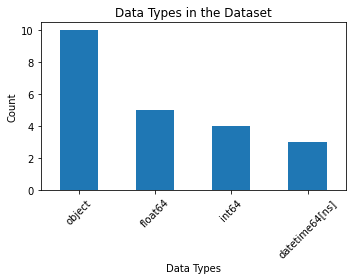

In [78]:
data_type_counts = df.dtypes.value_counts()

plt.figure(figsize=(5, 4))
data_type_counts.plot(kind='bar')
plt.title('Data Types in the Dataset')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='#93C0A4'> 

**Insights:**

Highest count of the datatype is object and the lowest would be float64
</font>

#### b. Understanding the Balance of our Dataset

In [79]:
print('Normal Transactions:', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fruad Transactions:', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal Transactions: 99.48 % of the dataset
Fruad Transactions: 0.52 % of the dataset


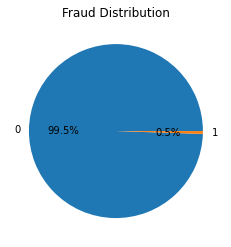

0    1842743
1       9651
Name: is_fraud, dtype: int64


In [80]:
# Count occurrences of '0' and '1' in the 'target_column'
counts = df['is_fraud'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Fraud Distribution')
plt.show()
print(counts)

We can see that we are also dealing with an imbalanced dataset, there are significantly more non-fraud transactions than fraud transactions.

#### c. Distribution by Genders

Category with the highest number of transactions is "gas_transport", which the one with the lowest would be "travel"

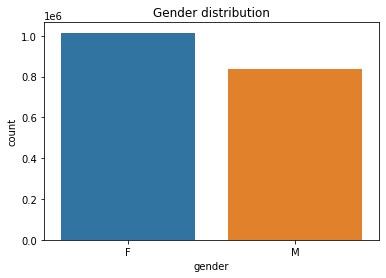

In [81]:
sns.countplot(x='gender', data=df)
plt.title('Gender distribution')
plt.show()

There are more transactions associated with female than that of males.

#### d. Geography Distribution

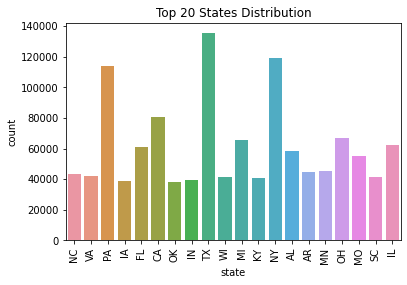

In [82]:
## Since there are many different states, we will plot the top 20
# Get the top 20 states by count
top_states = df['state'].value_counts().head(20).index

# Filter your DataFrame to only include the top 20 states
df_top20 = df[df['state'].isin(top_states)]

# Create a countplot for the top 20 states
sns.countplot(x='state', data=df_top20)
plt.title('Top 20 States Distribution')
plt.xticks(rotation=90)
plt.show()

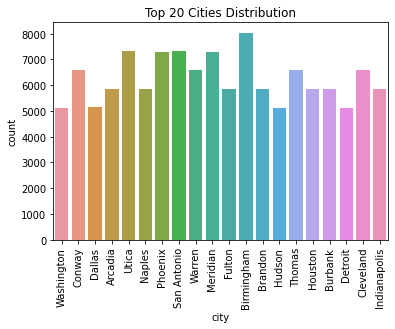

In [83]:
## Since there are many different cities we will plot the top 20
# Get the top 20 cities by count
top_cities = df['city'].value_counts().head(20).index

# Filter your DataFrame to only include the top 20 cities
df_top20 = df[df['city'].isin(top_cities)]

# Create a countplot for the top 20 cities
sns.countplot(x='city', data=df_top20)
plt.title('Top 20 Cities Distribution')
plt.xticks(rotation=90)
plt.show()

#### e. Job Distribuition

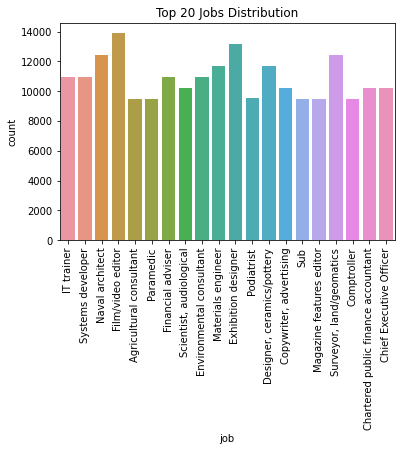

In [84]:
top_jobs = df['job'].value_counts().head(20).index

# Filter your DataFrame to only include the top 20 jobs
df_top20 = df[df['job'].isin(top_jobs)]

# Create a countplot for the top 20 jobs
sns.countplot(x='job', data=df_top20)
plt.title('Top 20 Jobs Distribution')
plt.xticks(rotation=90)
plt.show()

#### f. Transaction Amount vs. Merchant Category

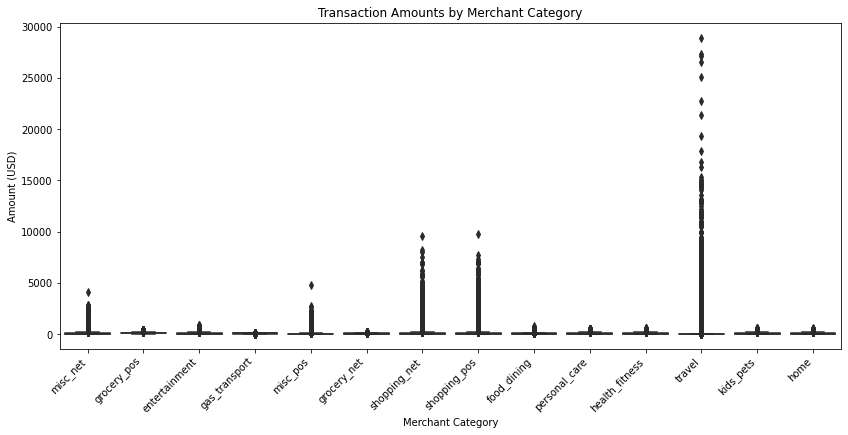

In [85]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(14, 6))
sns.boxplot(x='category', y='amount(usd)', data=df, palette='Blues')
plt.title('Transaction Amounts by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### g. Distribution of amount (usd) in our data

<AxesSubplot:xlabel='amount(usd)', ylabel='Density'>

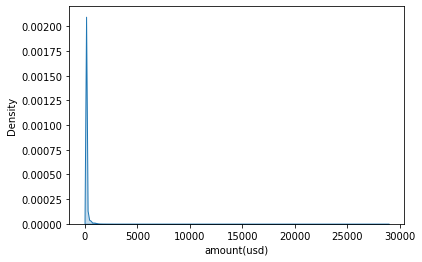

In [86]:
sns.kdeplot(df["amount(usd)"], fill=True)

The graph is being skewed severely, we can limit the range to view up to the 99 percentile

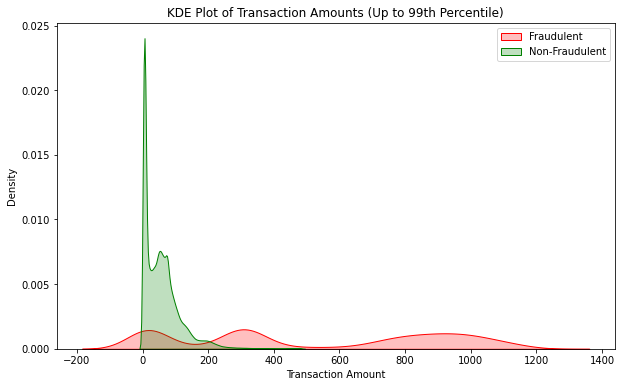

In [87]:
# Filter the 'train' DataFrame to separate fraudulent and non-fraudulent transactions
fraudulent_df = df[df['is_fraud'] == 1]
non_fraudulent_df = df[df['is_fraud'] == 0]

# Calculate the 99th percentile for both groups
fraudulent_99th_percentile = fraudulent_df['amount(usd)'].quantile(0.99)
non_fraudulent_99th_percentile = non_fraudulent_df['amount(usd)'].quantile(0.99)

# Create KDE plots for the 99th percentile values on the same axis
plt.figure(figsize=(10, 6))

# KDE plot for fraudulent transactions
sns.kdeplot(data=fraudulent_df[fraudulent_df['amount(usd)'] <= fraudulent_99th_percentile]['amount(usd)'], fill=True, common_norm=False, label='Fraudulent', color='red')

# KDE plot for non-fraudulent transactions
sns.kdeplot(data=non_fraudulent_df[non_fraudulent_df['amount(usd)'] <= non_fraudulent_99th_percentile]['amount(usd)'], fill=True, common_norm=False, label='Non-Fraudulent', color='green')

plt.title('KDE Plot of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')

plt.legend()
plt.show()

As you can see, the non-fraudulent transactions seem limited to $200 or less. However, the fraudulent transactions seem to peak at $300, and roughly $900, with even distribution spread throughout the peak.

#### h. Distribution of categories

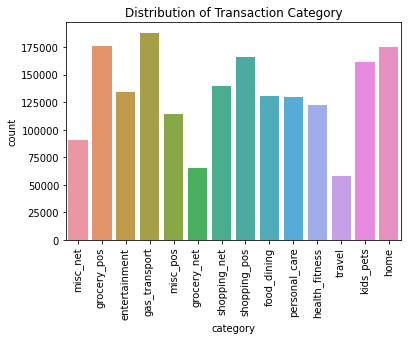

In [88]:
sns.countplot(x='category', data=df)
plt.title('Distribution of Transaction Category')
plt.xticks(rotation=90)
plt.show()


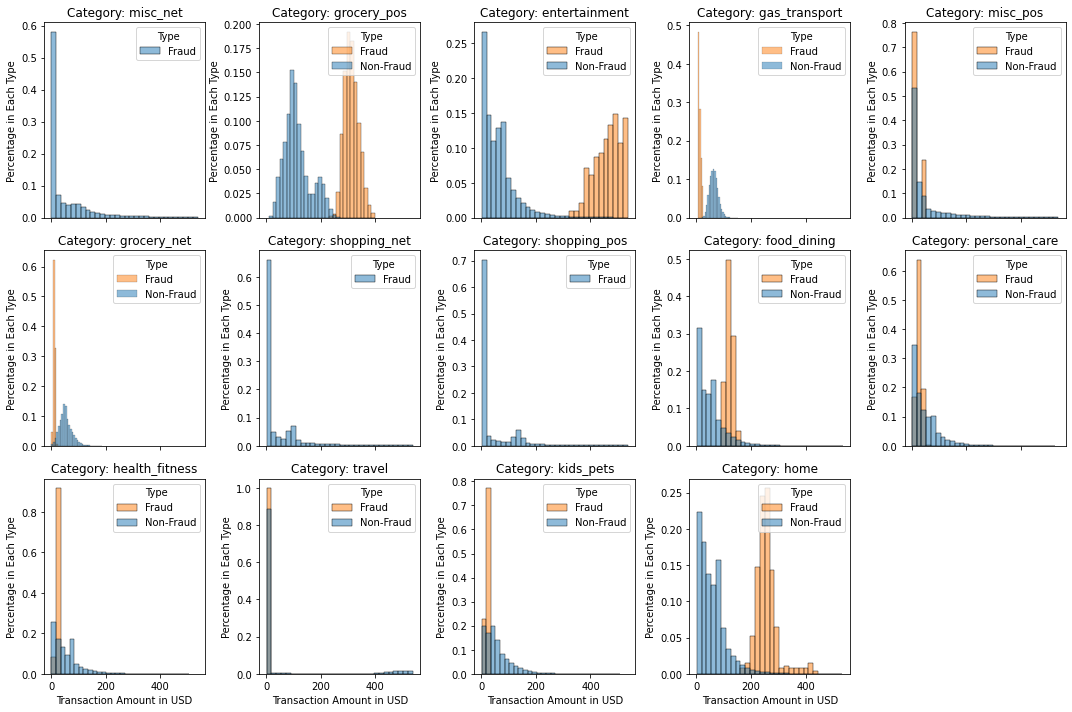

In [89]:
# Extract unique categories from the 'category' column
unique_categories = df['category'].unique()

# Calculate the number of unique categories
num_categories = len(unique_categories)

# Determine the number of rows and columns for subplots
num_rows = int(num_categories**0.5)
num_cols = (num_categories // num_rows) + 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharex=True)

# Flatten the axes to handle varying subplot arrangements
axes = axes.flatten()

# Iterate through each category for visualization
for i, category in enumerate(unique_categories):
    # Create a subset of the DataFrame for the current category
    data_category = df[df['category'] == category]

    # Determine the current subplot
    ax = axes[i]

    # Create a KDE plot for transaction amounts in the current category
    sns.histplot(data=data_category[data_category['amount(usd)'] <= df['amount(usd)'].quantile(0.99)
],
                 x='amount(usd)', hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'Category: {category}')
    ax.legend(title='Type', labels=['Fraud', 'Non-Fraud'])

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust subplot layout for neat arrangement
plt.tight_layout()

# Display the subplots
plt.show()

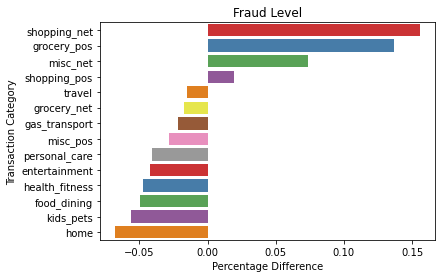

In [90]:
##Creating analysis of fraud levels across different categories in the dataset
# Extract non-fraudulent transactions and calculate percentages
non_fraudulent = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).reset_index()
non_fraudulent.columns = ['category', 'non_fraud_percentage']

# Extract fraudulent transactions and calculate percentages
fraudulent = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).reset_index()
fraudulent.columns = ['category', 'fraud_percentage']

# Merge and calculate fraud level
fraud_level_df = non_fraudulent.merge(fraudulent, on='category')
fraud_level_df['fraud_level'] = fraud_level_df['fraud_percentage'] - fraud_level_df['non_fraud_percentage']

fraud_level_df

# Define a custom color palette
custom_palette = sns.color_palette("Set1")

# Create a bar plot to visualize the 'fraud_level' for each category
ax = sns.barplot(y='category', x='fraud_level',
                 data=fraud_level_df.sort_values('fraud_level', ascending=False), palette=custom_palette)

# Set labels and title
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level')

# Display the plot
plt.show()


Looking at the graph above, it seems the categories ("shopping_net", "grocery_pos", "misc_net", "shopping_pos") have a positive percentage difference, compared to the other categories. The categories ("food_dining", "kids_pet", "home") are the categories that have lowest likelihood of being involved in fraudulent activities.

#### i. Time-based Analysis (transactions over time split by fraudulent/normal transactions)

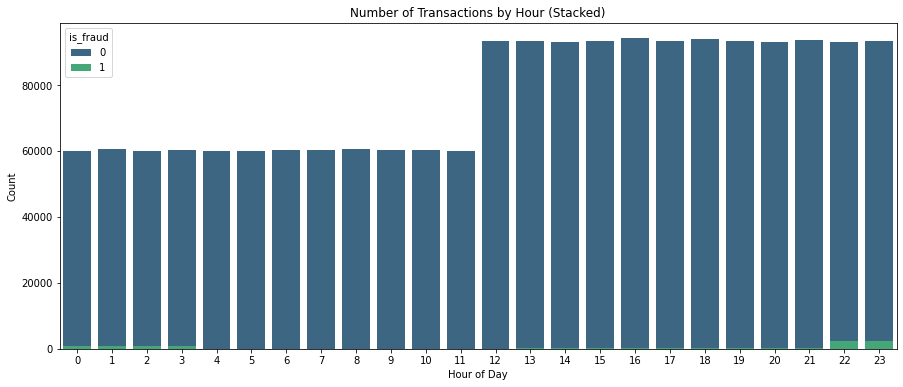

In [91]:
# Assuming your DataFrame is named 'df'
df['transaction_hour'] = df['transaction_time'].dt.hour

# Plot stacked bar chart
plt.figure(figsize=(15, 6))
sns.countplot(x='transaction_hour', data=df, hue='is_fraud', palette='viridis', dodge=False)
plt.title('Number of Transactions by Hour (Stacked)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

From the graph, we can see that fraud transactions occur the most often during hours 22 and 23.

## 7. Feature Engineering
#### a. `transaction_time` feature can be feature engineered into the following:
- Transaction `day`: monday, tuesday, ...
- Transaction `month`: january, february, ...
- Transaction `year`: 2019, 2020, ...
- Transaction `hour`: 0, 1, 2, ..., 24

In [92]:
df['hour_of_day'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.day_name()
df['month']  = pd.DatetimeIndex(df['transaction_time']).month
df['year'] = pd.DatetimeIndex(df['transaction_time']).year

df[['hour_of_day','day_of_week','month','year']].head(10)

,hour_of_day,day_of_week,month,year
0,0,Tuesday,1,2019
1,0,Tuesday,1,2019
2,0,Tuesday,1,2019
3,0,Tuesday,1,2019
4,0,Tuesday,1,2019
5,0,Tuesday,1,2019
6,0,Tuesday,1,2019
7,0,Tuesday,1,2019
8,0,Tuesday,1,2019
9,0,Tuesday,1,2019


#### a. New Feature: `age` of Customer
It is determined by taking the difference between a Customer's Date of Birth and Transaction Date

In [93]:
transaction_date = df['transaction_time']
df['age'] = transaction_date.dt.year - df['dob'].dt.year # age = transaction_date - dob
# Sort the DataFrame by the "age" column in ascending order
df.sort_values(by='age')
df['age']

0          31
1          41
2          57
3          52
4          33
           ..
1852389    54
1852390    21
1852391    39
1852392    55
1852393    27
Name: age, Length: 1852394, dtype: int64

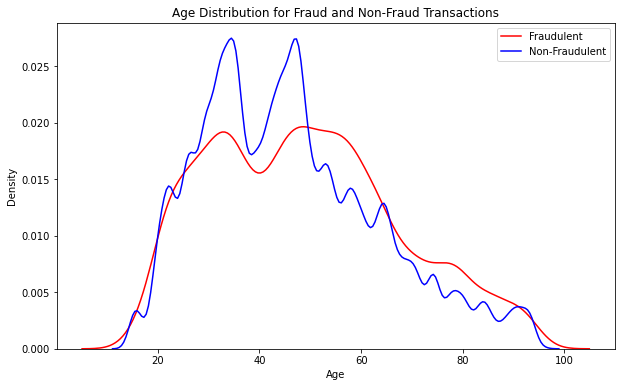

In [94]:
# Create KDE plots for age distribution
plt.figure(figsize=(10, 6))

# KDE plot for fraud transactions
sns.kdeplot(data=df[df['is_fraud'] == 1]['age'], label='Fraudulent', color='red')

# KDE plot for non-fraud transactions
sns.kdeplot(data=df[df['is_fraud'] == 0]['age'], label='Non-Fraudulent', color='blue')

plt.title('Age Distribution for Fraud and Non-Fraud Transactions')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

As seen in the graph, for non-fraudulent transactions, the density peaks around 35-40 years, and then again at 50. The graph for fraudulent transaction opposes this, as even though the peaks are similar in terms of age, it has a much more even distribution across all ages

In [95]:
# Create bins to categorize the age group
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20','21-40','41-60', '61-80', '81-100']

# Use the cut function to create the age_group feature
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new age_group feature
df['age_group']

0          21-40
1          41-60
2          41-60
3          41-60
4          21-40
           ...  
1852389    41-60
1852390    21-40
1852391    21-40
1852392    41-60
1852393    21-40
Name: age_group, Length: 1852394, dtype: category
Categories (5, object): ['0-20' < '21-40' < '41-60' < '61-80' < '81-100']

In [96]:
df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,transaction_hour,hour_of_day,day_of_week,month,year,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,0,Tuesday,1,2019,31,21-40
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,0,Tuesday,1,2019,41,41-60
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,0,Tuesday,1,2019,57,41-60
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,0,Tuesday,1,2019,52,41-60
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,0,Tuesday,1,2019,33,21-40


In [97]:
#Calculate distance between merchant and home location
df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))
df['longitudinal_distance']
df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,transaction_hour,hour_of_day,day_of_week,month,year,age,age_group,latitudinal_distance,longitudinal_distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,0,Tuesday,1,2019,31,21-40,0.068,0.870
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,0,Tuesday,1,2019,41,41-60,0.271,0.024
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,0,Tuesday,1,2019,57,41-60,0.970,0.108
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,0,Tuesday,1,2019,52,41-60,0.804,0.447
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,0,Tuesday,1,2019,33,21-40,0.254,0.830


#### export dataset for classification of job categories

In [98]:
df.to_csv('../fraudDataset.csv')

#### d. Job Categories Classification 
we will only load the dataset which has undergone the classification of job categories here

**refer to `job_categories_classifcation.ipynb` for detailed explanation and coding processs as it is computationally expensive.** 



In [99]:
df = pd.read_csv('../fraudDataset_jobs_classified.csv').iloc[:,1:]
df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,transaction_hour,hour_of_day,day_of_week,month,year,age,age_group,latitudinal_distance,longitudinal_distance,job_categories
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,0,Tuesday,1,2019,31,21-40,0.068,0.870,C2
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,0,Tuesday,1,2019,41,41-60,0.271,0.024,C2
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,0,Tuesday,1,2019,57,41-60,0.970,0.108,C6
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,0,Tuesday,1,2019,52,41-60,0.804,0.447,C2
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,0,Tuesday,1,2019,33,21-40,0.254,0.830,C2


## 8. Final Dataset (Cleaned & Globally Preprocessed)

drop irrelevant columns

In [100]:
columns_to_drop = ['transaction_time', 'credit_card_number', 'merchant', 'first', 'last', 'street','city','zip','dob','job','city_pop','transaction_id','time','month','year','age_group','latitudinal_distance','longitudinal_distance']
df = df.drop(columns=columns_to_drop)
df.head(10)

,category,amount(usd),gender,state,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,hour_of_day,day_of_week,age,job_categories
0,misc_net,4.97,F,NC,36.0788,-81.1781,36.011293,-82.048315,0,0,0,Tuesday,31,C2
1,grocery_pos,107.23,F,WA,48.8878,-118.2105,49.159047,-118.186462,0,0,0,Tuesday,41,C2
2,entertainment,220.11,M,ID,42.1808,-112.2620,43.150704,-112.154481,0,0,0,Tuesday,57,C6
3,gas_transport,45.00,M,MT,46.2306,-112.1138,47.034331,-112.561071,0,0,0,Tuesday,52,C2
4,misc_pos,41.96,M,VA,38.4207,-79.4629,38.674999,-78.632459,0,0,0,Tuesday,33,C2
5,gas_transport,94.63,F,PA,40.3750,-75.2045,40.653382,-76.152667,0,0,0,Tuesday,58,C2
6,grocery_net,44.54,F,KS,37.9931,-100.9893,37.162705,-100.153370,0,0,0,Tuesday,26,C6
7,gas_transport,71.65,M,VA,38.8432,-78.6003,38.948089,-78.540296,0,0,0,Tuesday,72,C2
8,misc_pos,4.27,F,PA,40.3359,-79.6607,40.351813,-79.958146,0,0,0,Tuesday,78,C2
9,grocery_pos,198.39,F,TN,36.5220,-87.3490,37.179198,-87.485381,0,0,0,Tuesday,45,C2


## 9. Train Test Split -> Train, Validation & Split 80 10 10 since relatively large dataset

In [101]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# stratified sampling for imbalanced classes
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) # X_train 80% of total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42) # X_val and X_test will be 10% of total

**Export Training, Validation and Test Datasets to Previous Folder**

In [102]:
# X
X_train.to_csv('../X_train.csv', index=False)
X_val.to_csv('../X_val.csv', index=False)
X_test.to_csv('../X_test.csv', index=False)

# y
y_train.to_csv('../y_train.csv', index=False)
y_val.to_csv('../y_val.csv', index=False)
y_test.to_csv('../y_test.csv', index=False)

### **from here on, depending on what model we are running, then do encoding and feature scaling accordingly... becuz it depends on model requirements**